## Doc2Vec On The WikiVoyage Corpus

In [129]:
from IPython.display import Image

Motivation: I love to travel, especially to offbeat/out-of-the-way/unusual places

Challenge: Discovering these places is still a highly manual process

Currently relies on:

- Folk knowledge
- Word of mouth (hopefully your friends have some good recommendations)
- Random discovery (reading the right article, watching the right travel show)
- Wandering

Goal: To develop a system to help people discover new places to travel to.

How: Use the Wikivoyage corpus (currently only North America and Europe) to train a Doc2Vec model and then use cosine similarity to generate new travel ideas based on places and topics that we feed into the model

### Results

In [121]:
import gensim

In [122]:
model = gensim.models.Doc2Vec.load("doc2vec_dm_NAEUR.model")

In [123]:
model.docvecs.most_similar(positive=[model["gambling"]])

[(u'Las Vegas', 0.4692399799823761),
 (u'Wells (Nevada)', 0.44553759694099426),
 (u'Black Hawk', 0.41475480794906616),
 (u'Pahrump', 0.40906670689582825),
 (u'Beatty', 0.40621137619018555),
 (u'Boulder City', 0.4015314280986786),
 (u'Laughlin', 0.3741351068019867),
 (u'Atlantic City', 0.3719399571418762),
 (u'Lake Tahoe', 0.3686116337776184),
 (u'South Lake Tahoe', 0.35805609822273254)]

In [128]:
model.docvecs.most_similar(positive=[model["skiing"],model["gambling"],"California"])

[(u'Lake Tahoe', 0.42162561416625977),
 (u'South Lake Tahoe', 0.41278210282325745),
 (u'Rauland', 0.39757058024406433),
 (u'Wells (Nevada)', 0.35675251483917236),
 (u'Las Vegas', 0.3492353856563568),
 (u'Nevada', 0.34744125604629517),
 (u'Reno', 0.34133267402648926),
 (u'Yll\xe4s', 0.3409240245819092),
 (u'Black Hawk', 0.33933377265930176),
 (u"Val-d'Is\xe8re", 0.33322441577911377)]

In [62]:
model.docvecs.most_similar(positive=[model["beaches"]])

[(u'Mayan Riviera', 0.45207858085632324),
 (u'Huatulco', 0.43176454305648804),
 (u'Zipolite', 0.42858099937438965),
 (u'Ixtapa', 0.4270773231983185),
 (u'Akumal', 0.4214611053466797),
 (u'Cozumel', 0.4185025095939636),
 (u'Playa del Carmen', 0.4122311472892761),
 (u'Zihuatanejo', 0.4080858826637268),
 (u'Puerto Vallarta', 0.40323808789253235),
 (u'Vasto', 0.4008360207080841)]

In [108]:
model.docvecs.most_similar(positive=["Las Vegas",model['kids'],"Florida"],negative=["Nevada"])

[(u'Walt Disney World/Disney Springs', 0.31546011567115784),
 (u'Walt Disney World', 0.31259435415267944),
 (u'Varvara', 0.3068995773792267),
 (u'Canc\xfan', 0.30667930841445923),
 (u'Looe', 0.29569607973098755),
 (u'Walt Disney World/Hollywood Studios', 0.29355520009994507),
 (u'Lappaj\xe4rvi', 0.2845228910446167),
 (u'Walt Disney World/Animal Kingdom', 0.2813645899295807),
 (u'Acapulco', 0.2766570448875427),
 (u'Kuortane', 0.2747095227241516)]

In [84]:
model.docvecs.most_similar(positive=["Seattle","Georgia (state)"],negative=["Washington (state)"])

[(u'Atlanta', 0.39574217796325684),
 (u'Cookeville', 0.27874839305877686),
 (u'Greenville (South Carolina)', 0.2569996118545532),
 (u'Wilson', 0.24723148345947266),
 (u'Greenville (North Carolina)', 0.24619674682617188),
 (u'Research Triangle', 0.23729246854782104),
 (u'Brunswick (Georgia)', 0.23575204610824585),
 (u'Piedmont (Georgia)', 0.23453886806964874),
 (u'Seattle/Downtown', 0.22976917028427124),
 (u'Seattle/Queen Anne-South Lake Union', 0.22697080671787262)]

## Something more interesting

Who knows of Williamsburg in Brooklyn?

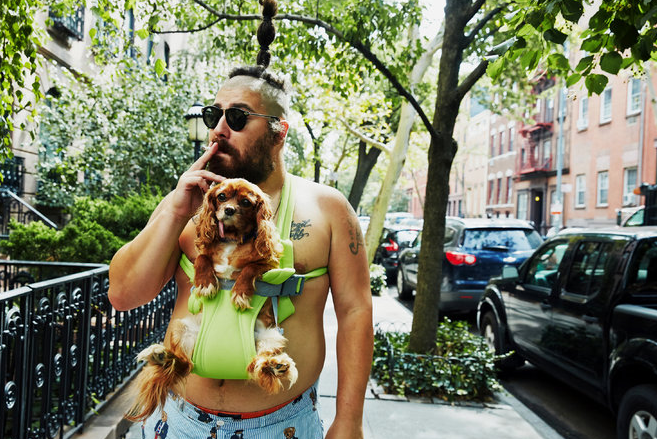

In [131]:
Image(filename='Screen Shot 2015-12-13 at 7.41.52 PM.png')

Josh Ostrovsky, a.k.a. “The Fat Jew,” is known for his profane humor and huge web presence. Credit Steven Brahms for The New York Times

^This is who I think of when I think of Williamsburg

Historically a working class area - subsequently taken over by yuppies and hipsters

Depending on your views, you may want to visit places like this (or run from them)

### Introducing the Williamsburg locator

In [90]:
def Williamsburg(Metro):
    return model.docvecs.most_similar(positive=["Brooklyn/Williamsburg",Metro],negative=["New York City"])

In [91]:
Williamsburg("San Francisco")

[(u'San Francisco/SoMa', 0.34045329689979553),
 (u'Oakland', 0.31408262252807617),
 (u'San Francisco/Castro-Noe Valley', 0.30932530760765076),
 (u'San Francisco/The Avenues', 0.3084043860435486),
 (u'San Francisco/Western Addition', 0.30720651149749756),
 (u'San Francisco/Southeast', 0.3040141761302948),
 (u'San Jose (California)', 0.29996657371520996),
 (u'San Francisco/Golden Gate', 0.2990891933441162),
 (u'Millbrae', 0.2954830825328827),
 (u'San Mateo', 0.2934788465499878)]

In [92]:
Williamsburg("Boston")

[(u'Cambridge (Massachusetts)', 0.3884972631931305),
 (u'Boston/Dorchester', 0.2815379202365875),
 (u'Boston/Beacon Hill', 0.25701427459716797),
 (u'Nashua (New Hampshire)', 0.25510767102241516),
 (u'Newton', 0.2438473403453827),
 (u'Boston/Jamaica Plain', 0.24315953254699707),
 (u'New Bedford', 0.24228599667549133),
 (u'Boston/Charlestown', 0.23969599604606628),
 (u'Lexington (Massachusetts)', 0.23508819937705994),
 (u'Miami/Overtown', 0.23371116816997528)]

In [93]:
Williamsburg("Paris")

[(u'Paris/20th arrondissement', 0.356248676776886),
 (u'Paris/19th arrondissement', 0.3258187472820282),
 (u'Paris/6th arrondissement', 0.3206578195095062),
 (u'Paris/17th arrondissement', 0.3003493845462799),
 (u'Nogent-sur-Marne', 0.2983584702014923),
 (u'Paris/10th arrondissement', 0.2917677164077759),
 (u'Paris/9th arrondissement', 0.2859533429145813),
 (u'Paris/La D\xe9fense', 0.280295729637146),
 (u'Saint Denis', 0.26104071736335754),
 (u'Paris/12th arrondissement', 0.25988340377807617)]

In [94]:
Williamsburg("Montreal")

[(u'Montreal/Quartier Latin-Le Village', 0.341674268245697),
 (u'Montreal/South West', 0.30806463956832886),
 (u'Quebec City', 0.2635706961154938),
 (u'Montreal/West Island', 0.26224732398986816),
 (u'Quebec', 0.25512123107910156),
 (u'Sherbrooke', 0.25188568234443665),
 (u'Montreal/Downtown', 0.250841349363327),
 (u'Mont\xe9r\xe9gie', 0.24994179606437683),
 (u'Montreal/Hochelaga-Maisonneuve', 0.23459258675575256),
 (u'Rigaud', 0.22433531284332275)]

In [101]:
Williamsburg('Detroit')

[(u'Detroit/Downtown', 0.42757827043533325),
 (u'Metro Detroit', 0.3878357410430908),
 (u'Detroit/Midtown-New Center', 0.3778426945209503),
 (u'Franklin (Michigan)', 0.2981802523136139),
 (u'Detroit/Southwest Side', 0.29475998878479004),
 (u'Washtenaw County', 0.28032079339027405),
 (u'Ann Arbor', 0.2722225785255432),
 (u'Flint', 0.26905524730682373),
 (u'Dearborn', 0.26677072048187256),
 (u'Ypsilanti', 0.24946075677871704)]

In [126]:
model.docvecs.most_similar([model['hipsters']],topn=50)

[(u'Atlanta/Little Five Points', 0.36603689193725586),
 (u'Cleveland/West Side', 0.3568888008594513),
 (u'Manhattan/Lower East Side', 0.34965312480926514),
 (u'Paris/20th arrondissement', 0.3441842794418335),
 (u'Seattle/Capitol Hill-Central District', 0.33608317375183105),
 (u'Buffalo/Allentown and the Delaware District', 0.3348085880279541),
 (u'Queens/Long Island City and Astoria', 0.3264613747596741),
 (u'Buffalo/West Side', 0.3235052525997162),
 (u'Chicago/Wicker Park', 0.31541532278060913),
 (u'San Francisco/Haight', 0.30540892481803894),
 (u'Paris/17th arrondissement', 0.30482929944992065),
 (u'Boston/South End', 0.29873865842819214),
 (u'Berlin/East Central', 0.29147371649742126),
 (u'Buffalo/North Buffalo', 0.2911246120929718),
 (u'Buffalo/Elmwood Village', 0.2910820245742798),
 (u'Chicago/Lincoln Park-Old Town', 0.283674955368042),
 (u'San Francisco/Castro-Noe Valley', 0.2836647033691406),
 (u'San Francisco/Civic Center-Tenderloin', 0.2829035520553589),
 (u'San Francisco/Miss

### Caveats
- Still requires some human review as sometimes it will generate recommendations that do not make "human" sense
- Some category pages are still in the dataset, so those probably need to be removed 

## Potential Applications

### Travel Companies

- Help customers decide where to travel (e.g. Kayak, Priceline, Orbitz)
- If customers already know where they're going, help them decide where to stay/visit (e.g. Homeaway, Airbnb)

### Word2Vec/Doc2Vec Model

Utilizes a simple Neural Network

#### Neural Networks

Neural Networks:

1. Take in series of inputs (features)
2. Apply initial weights
3. Apply hidden layer activation functions
4. Apply additional weights
5. (Repeat steps 3 and 4 as desired) - NOT USED IN Word2Vec
6. Apply Output Function
7. Update weights based on Gradient Descent

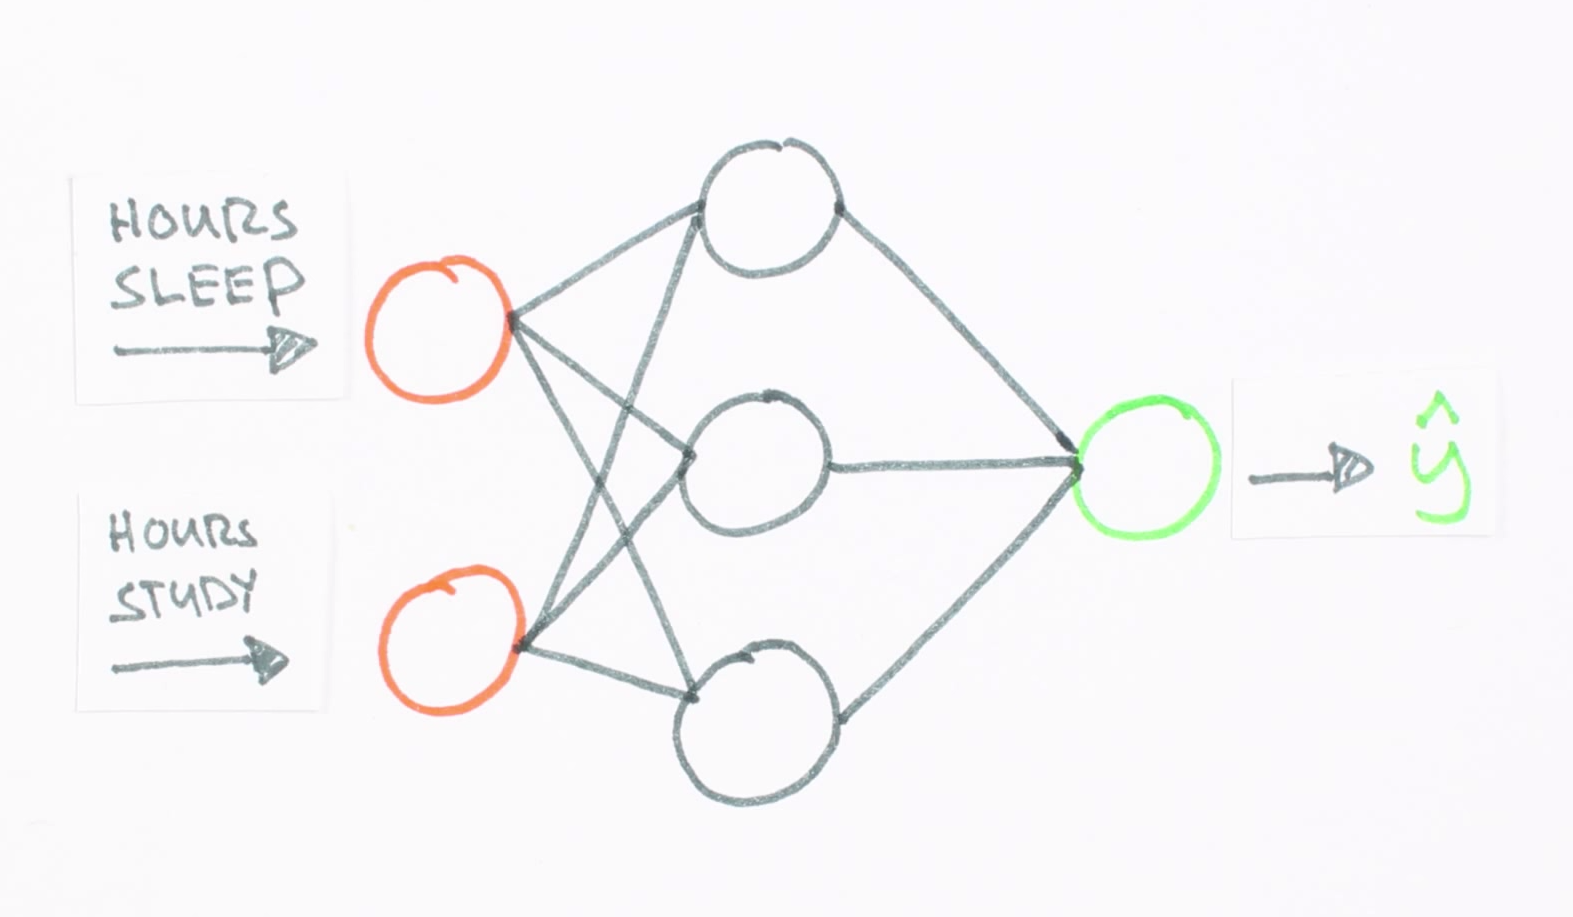

In [132]:
Image(filename="simpleNetwork.png")

Credit: Neural-Networks-Demystified Stephen Welch
https://github.com/stephencwelch/Neural-Networks-Demystified/

### Simple Neural Net Example

Pedro Domingos (In his book the Master Algorithm) has a really good example of a simple Neural Net

XOR formulation - returns TRUE if one condition is true. If both or none of the conditions are true, return False.

Eg. It's said that Nike's customer base consists of 2 groups, young males and older females.

This formulation cannot be learned with a linear model.

*Insert graph

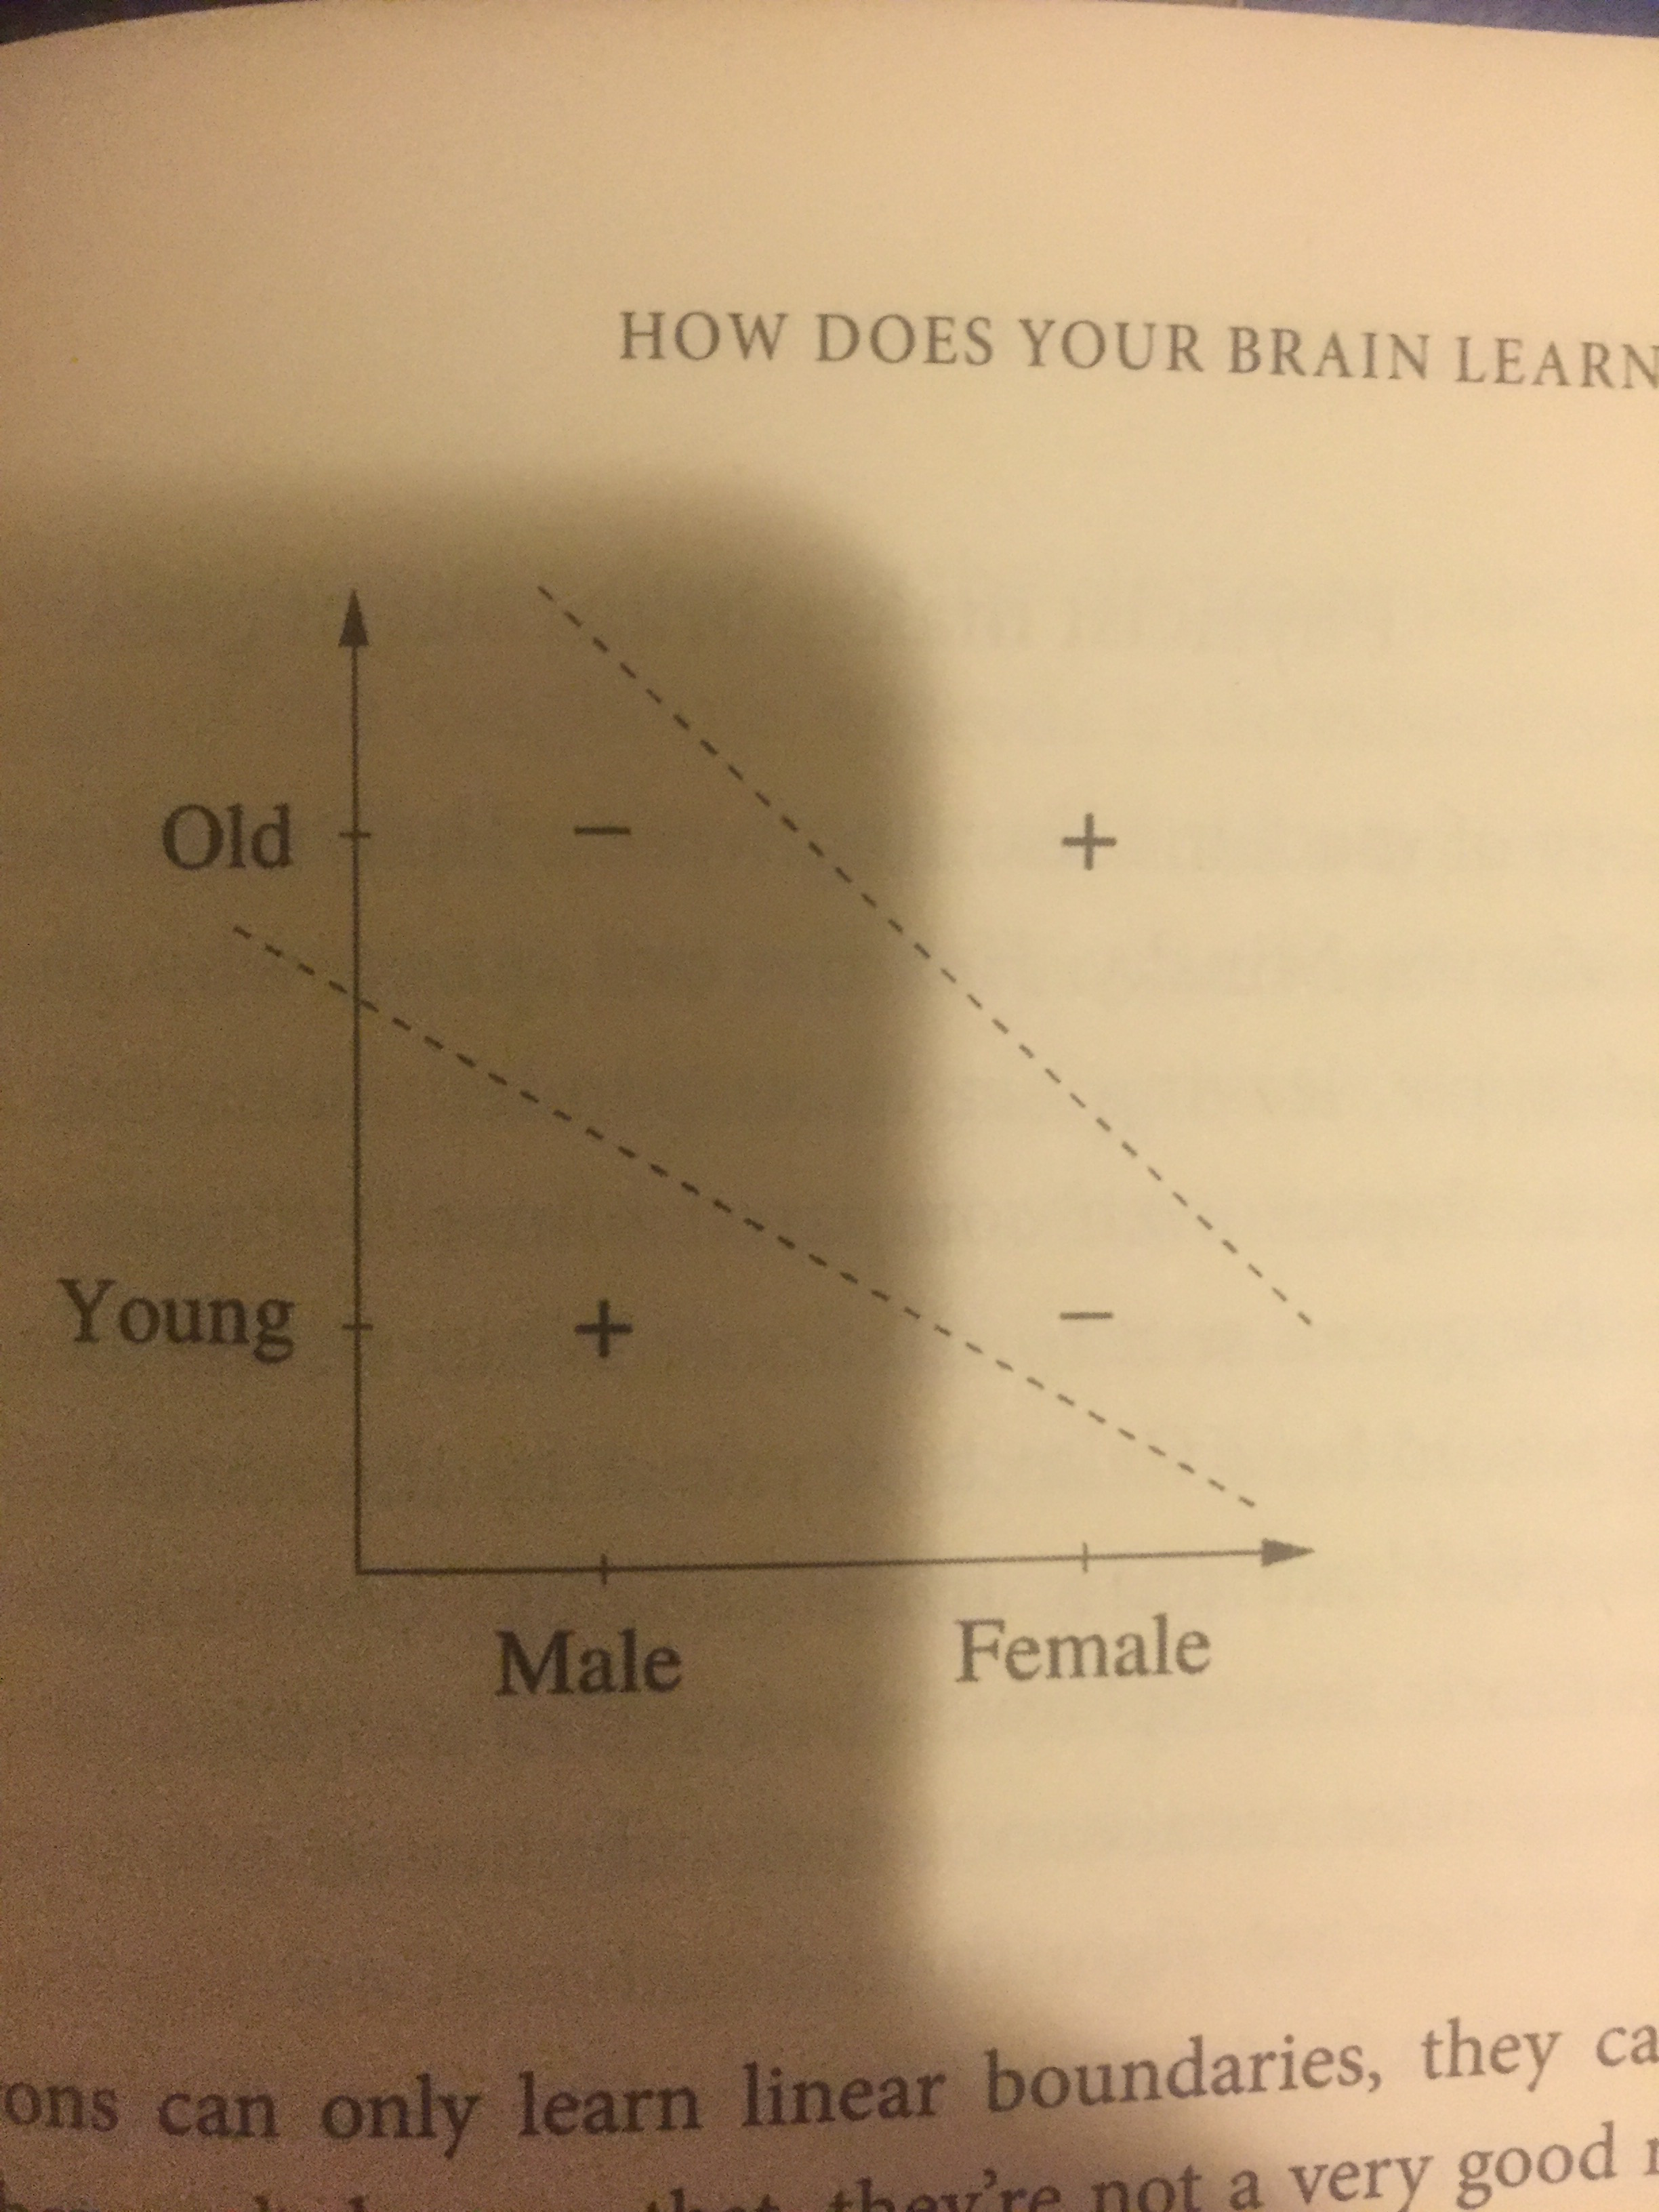

In [140]:
Image(filename="IMG_0103.JPG")

Neural Net is capable of learning an XOR forumulation with 3 nodes in the hidden layer
1. Activates if young male
2. Activates if older female
3. Activates if either of the other two activates

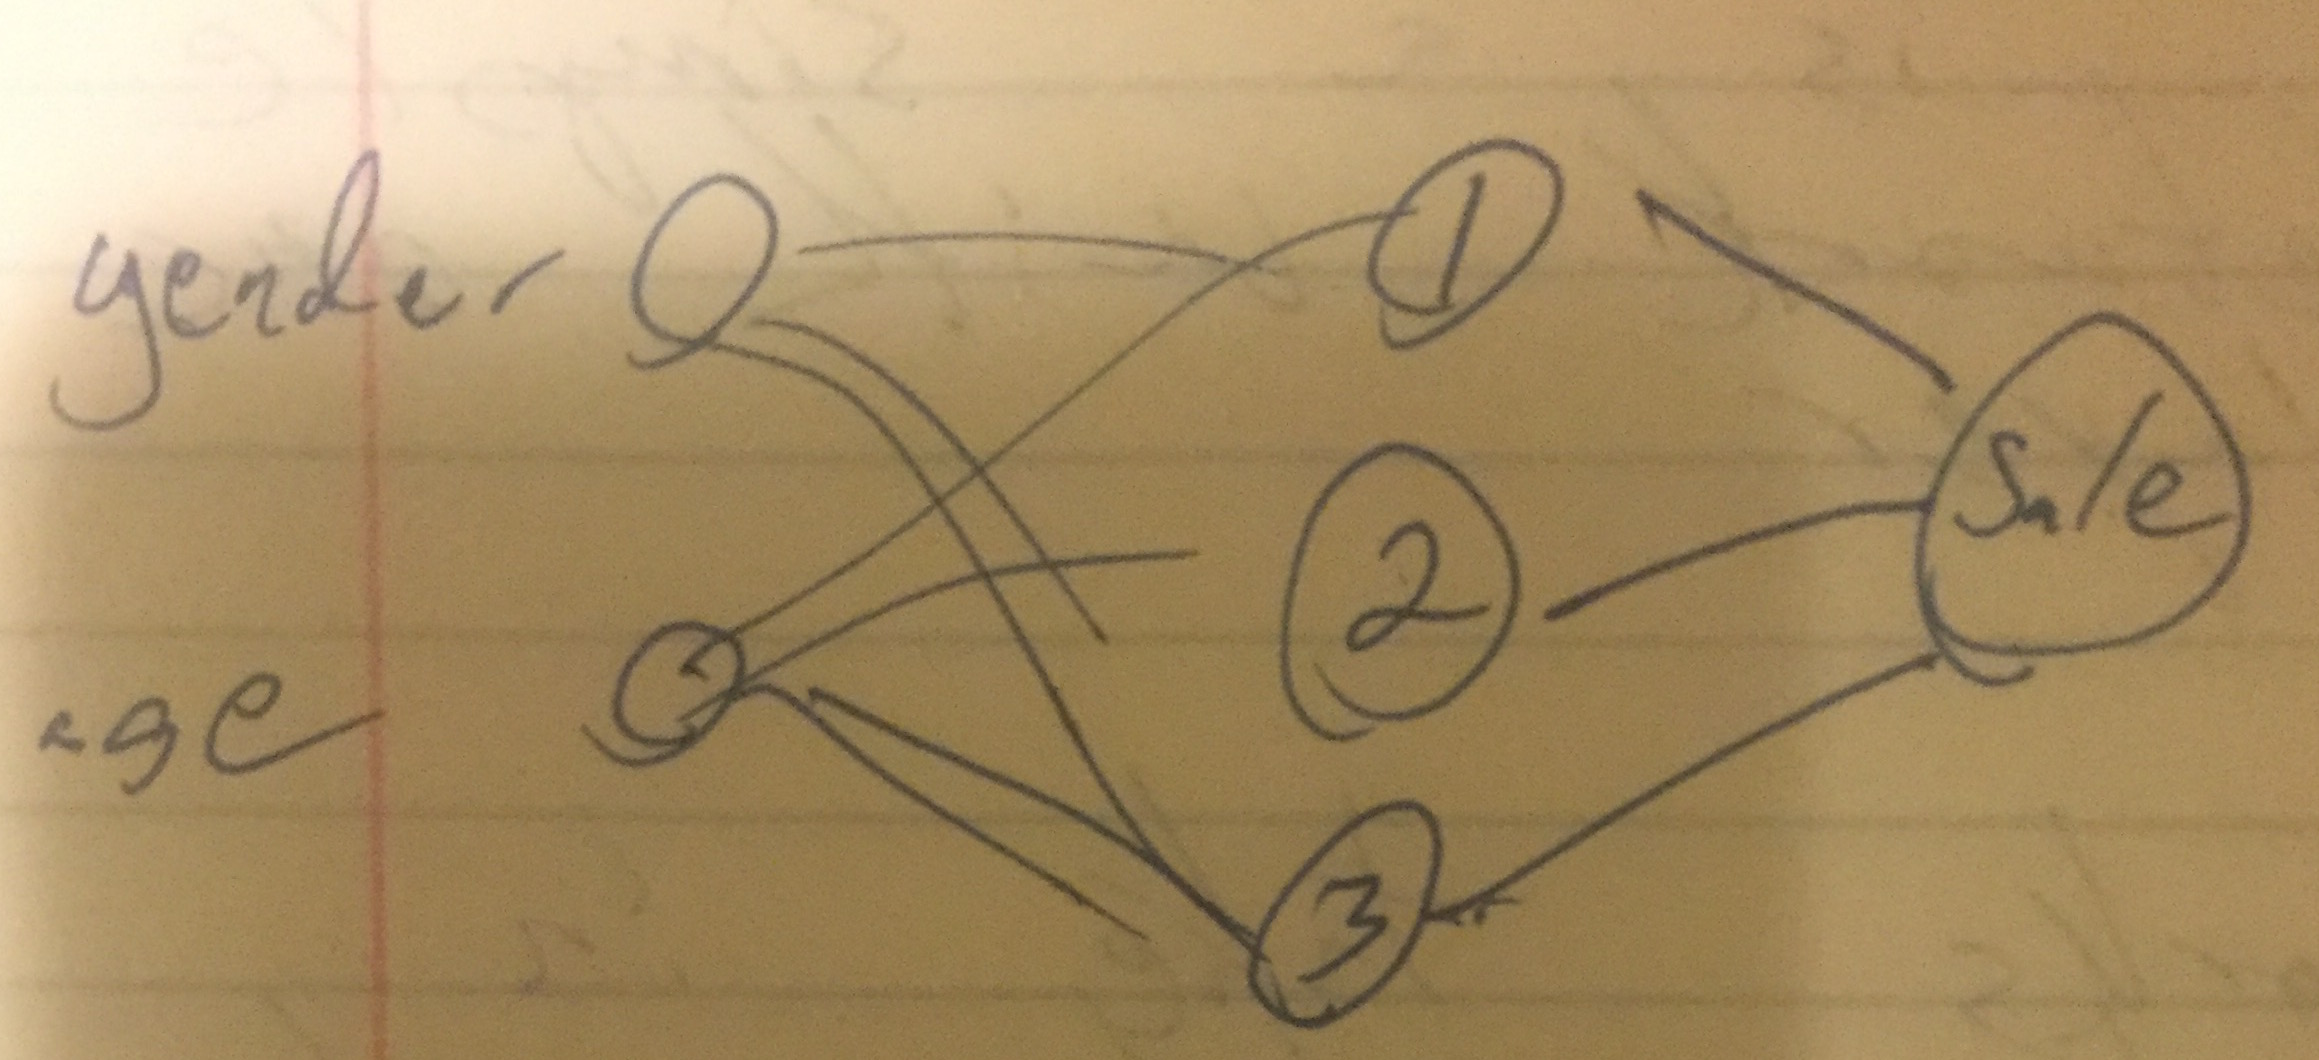

In [142]:
Image(filename="IMG_0105.JPG")

#### Word2Vec

Model assumes the Distributional Hypothesis: words that appear together share the same meaning

Goal of the CBOW model is to maximize the probability of the target word given its context

Inputs: One Hot Encoded Vector representations of words in the vocabulary. Each word is arbritarily assigned a vector

Hidden Layer: Size is determined by user (in this case 300 nodes were used)

Outputs are vector representations of words

Try to maximize the probability of an output word given an input context (CBOW) (context window is set by the user)

Word2Vec Continuous Bag of Words Model (CBOW):

1. Encode words as input vectors
2. Take the dot product of the input vectors and the weight matrix W
3. Repeat for the number of words in the size of the context C
4. At the hidden layer, take the summation of all the dot products from the previous two steps
5. Take the dot product of the output of the hidden layer and the second weight matrix, Wprime
6. The output function (in this case a softmax function is used) is applied to the output of step 5
7. Backprop to update the weights using Gradient Descent
8. Repeat for the desired number of iterations

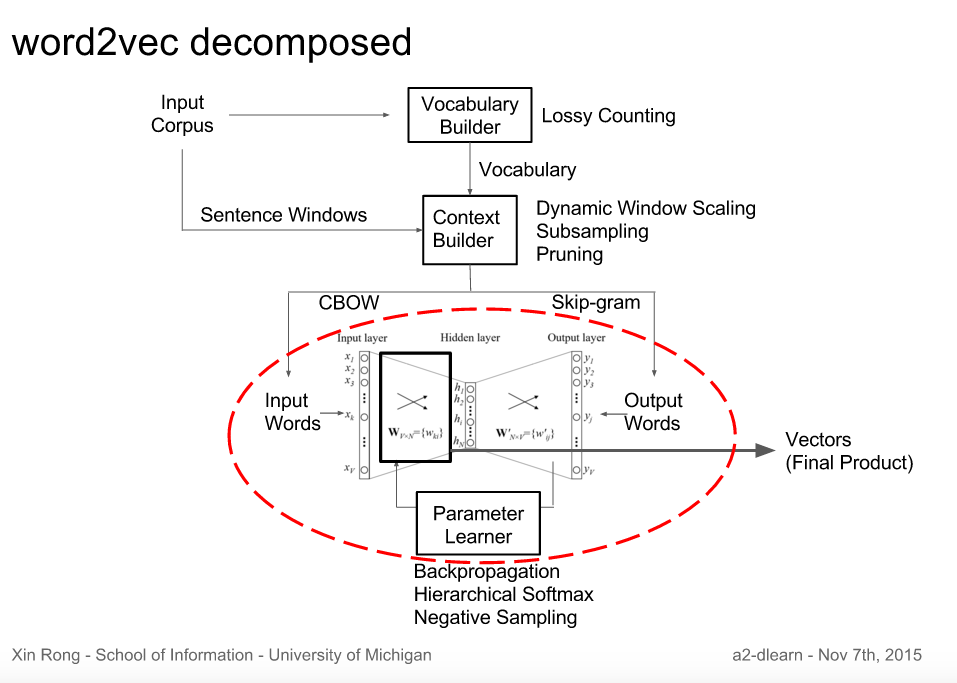

In [134]:
Image(filename="Screen Shot 2015-12-13 at 6.17.37 PM.png")

#### Doc2Vec / Paragraph Vectors

Doc2Vec is very similar to Word2Vec and is used to learn the labels/documents for a corpus of words.

In my case, the Wikivoyage dataset has the names of places (labels) which I will associate with the words (articles)

For Doc2Vec, a token that represents the document is a added to the context in the CBOW model

A vector representation of that document is then generated and can be used in Cosine similarity calcuations or as an input to another model (e.g. Kmeans).

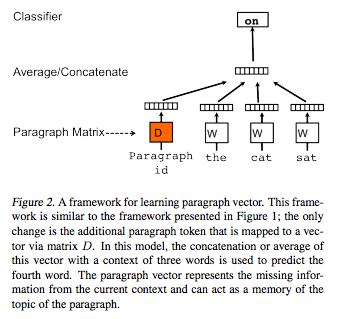

In [136]:
Image(filename="Screen Shot 2015-12-13 at 7.40.33 PM.png")

## Getting the Data

Utilized the MWClient to import data from a Wikimedia site (in this case Wikivoyage)

Data is stored in a tree structure with pages about a location stored underneath categories

Initially I tried to recursively download the data, but I found that iteratively traversing the tree structure worked better 

Saved data about the US, Canada, Mexico and Europe in pickle files

### EDA and Preprocessing

### Model Construction & Validation

### Potential Next Steps

1. Expand to the entire Wikivoyage dataset

2. Restrict results by geographic area
    
3. Utilize clustering to create groups of destinations

4. Pull in additional data, such as places on Wikipedia

### Key Takeaways

1. Iteratively tranverse tree structures
2. Word2Vec can be used outside of NLP

### Useful Resources

#### Word2Vec/Doc2Vec


- Xin Rong: Word2Vec Parameter Learning Explained http://arxiv.org/pdf/1411.2738.pdf
- StitchFix: A word is worth a thousand vectors
    - Video https://www.youtube.com/watch?v=vkfXBGnDplQ
    - Blog Post http://multithreaded.stitchfix.com/blog/2015/03/11/word-is-worth-a-thousand-vectors/
    
- TensorFlow: Vector representations of words https://www.tensorflow.org/versions/master/tutorials/word2vec/index.html
- Doc2Vec tutorial using Gensim https://medium.com/@klintcho/doc2vec-tutorial-using-gensim-ab3ac03d3a1#.j9zfhhg8i
- Deeplearning4j: Word2Vec Tutorial http://deeplearning4j.org/word2vec.html
- Rare Technologies: Doc2Vec tutorial http://rare-technologies.com/doc2vec-tutorial/
- Distributed Representations of Sentences and Documents http://nbviewer.ipython.org/github/fbkarsdorp/doc2vec/blob/master/doc2vec.ipynb


#### Neural Networks
- Neural Networks Demystified 
    - Video https://www.youtube.com/watch?v=bxe2T-V8XRs
    - Github https://github.com/stephencwelch/Neural-Networks-Demystified
- Intro to Neural Networks https://www.youtube.com/watch?v=DG5-UyRBQD4